# Ukraine Russia War Twitter Sentiment Analysis 

The objective of this project is to analyze tweets related to the Ukraine-Russia war using Natural Language Processing (NLP) techniques. The project focuses on performing sentiment analysis on Twitter data to classify public opinions as positive, negative, or neutral. Through this analysis, it will be possible to identify which side people support, understand the general emotional trends about the war, and evaluate public attitudes. The results aim to demonstrate how social media data can be utilized to understand public perception during times of crisis.

[Ukraine Russia War Twitter Sentiment Analysis | AMAN KHARAWAL](https://amanxai.com/2022/03/15/ukraine-russia-war-twitter-sentiment-analysis-using-python/)

<img src="https://i0.wp.com/epthinktank.eu/wp-content/uploads/2022/09/EPRS_BRIE_TT_733632_War_Ukraine_six_months_on_final.png?fit=1000%2C666&ssl=1"
     width="600" height="400" >

## Data Read

In [7]:
#%pip install wordcloud nltk matplotlib seaborn pillow

In [9]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv("filename.csv")

In [42]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [43]:
df.sample(7)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
6056,1630343559407697921,1630171219814219777,2023-02-27 23:06:09 UTC,2023-02-27,23:06:09,0,534958494,lgibradze,Leila Gibradze,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'usingeo', 'name': 'U.S. Emba...",NaN,NaN,NaN,NaN
8737,1630335098850783232,1629302338946048000,2023-02-27 22:32:32 UTC,2023-02-27,22:32:32,0,1335665029023211520,adotkitz,AdotKitz,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'UtahLibertyGov', 'name': 'Po...",NaN,NaN,NaN,NaN
5080,1630347018898948096,1630187799507812353,2023-02-27 23:19:54 UTC,2023-02-27,23:19:54,0,1712658776,thecommen7,Il Commento,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'andrea08543532', 'name': 'an...",NaN,NaN,NaN,NaN
1949,1630358262293090305,1630287282656755715,2023-02-28 00:04:34 UTC,2023-02-28,00:04:34,0,1354473115569414146,closecall777,closecall,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PatriciaBossy', 'name': 'PAB...",NaN,NaN,NaN,NaN
6936,1630340691032252426,1629737620874883073,2023-02-27 22:54:45 UTC,2023-02-27,22:54:45,0,1590224013871177728,chrconscap,Christian Conservative Capitalist,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'danceruby', 'name': 'keelile...",NaN,NaN,NaN,NaN
6716,1630341432769748998,1630272153475252224,2023-02-27 22:57:42 UTC,2023-02-27,22:57:42,0,633151825,dannygillette,Dan Gillette,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'robyslas', 'name': 'Roberto ...",NaN,NaN,NaN,NaN
5820,1630344402861187072,1629160025804480512,2023-02-27 23:09:30 UTC,2023-02-27,23:09:30,0,21255446,benparish,Ben,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Channel2Dg', 'name': 'Hoggy'...",NaN,NaN,NaN,NaN


In [44]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN
10013,1630331101817233414,1630248150954049537,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,1500491804176797700,dillengody,Gody van Dillen 🇺🇦 🇳🇱,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Lyla_lilas', 'name': 'Oriann...",NaN,NaN,NaN,NaN


In [45]:
df.shape

(10014, 36)

In [46]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [48]:
df = df[["username","tweet","language"]]

In [49]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [50]:
df["language"].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [53]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [54]:
df["tweet"]  = df["tweet"].apply(clean)

## Words CLoud

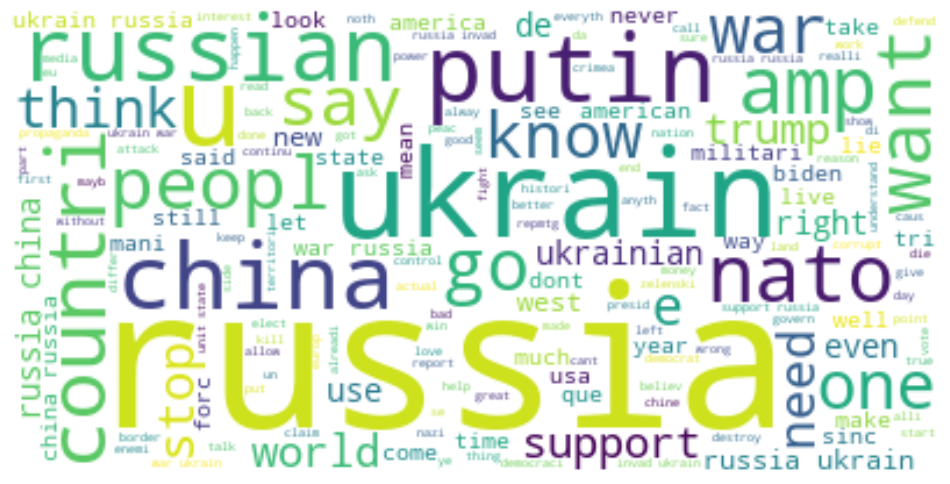

In [55]:
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
## Sentiment Score of the Tweets

In [66]:
nltk.download('vader_lexicon')  # vader duygu sözlüğünü indiriyoruz . 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
sentiments = SentimentIntensityAnalyzer()   # Vader analizörünü oluşturur . 

In [59]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]

In [60]:
df = df[["tweet", "Positive", "Negative", "Neutral"]]

In [61]:
df.head()

,tweet,Positive,Negative,Neutral
0,nazijaeg derwen russia place satan rule well,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.280,0.720
2,putin give steven seagal order friendship,0.367,0.000,0.633
3,mainelif baddcompani it alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.068,0.078,0.854


In [62]:
## most frequent words used by people positive sentiments

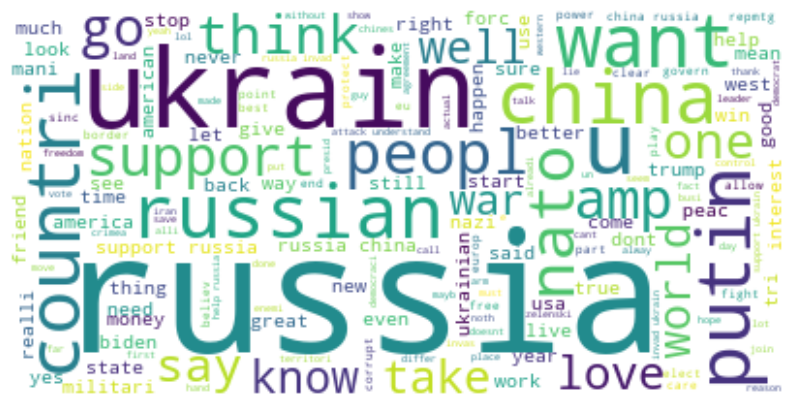

In [63]:
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
## most frequent words used by people with negative sentiments

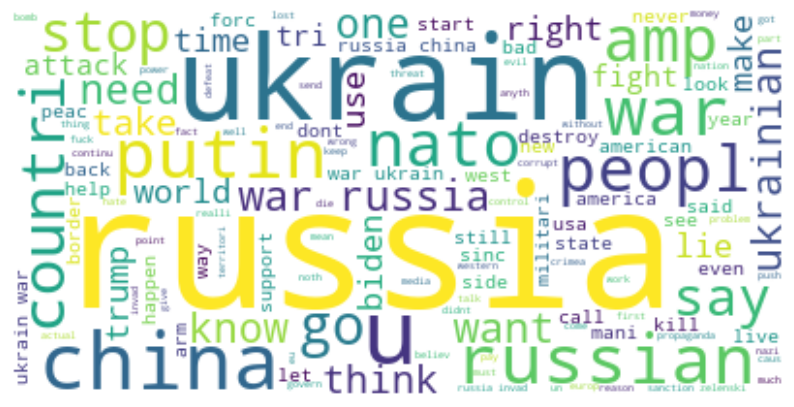

In [65]:
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()